# **Analyse de l'indice bourcier CAC40, analyse et prévision de l'action MC.PA**


In [145]:
# Importation des bibliothéques nécessaires pour l'analyse de l'indice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader, get_quote_yahoo
import yfinance as yahooFinance
import yfinance as yf
import datetime as dt



In [146]:
# Scraping de la base de donnée principale sur wikipedia 
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
cac40


,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [147]:
# Transformation de la colonne tickers en liste
tickers = cac40['Ticker'].to_list()
tickers

['AI.PA',
 'AIR.PA',
 'ALO.PA',
 'MT.AS',
 'CS.PA',
 'BNP.PA',
 'EN.PA',
 'CAP.PA',
 'CA.PA',
 'ACA.PA',
 'BN.PA',
 'DSY.PA',
 'ENGI.PA',
 'EL.PA',
 'ERF.PA',
 'RMS.PA',
 'KER.PA',
 'OR.PA',
 'LR.PA',
 'MC.PA',
 'ML.PA',
 'ORA.PA',
 'RI.PA',
 'PUB.PA',
 'RNO.PA',
 'SAF.PA',
 'SGO.PA',
 'SAN.PA',
 'SU.PA',
 'GLE.PA',
 'STLAP.PA',
 'STM.PA',
 'TEP.PA',
 'HO.PA',
 'TTE.PA',
 'URW.AS',
 'VIE.PA',
 'DG.PA',
 'VIV.PA',
 'WLN.PA']

In [148]:
# Récupération des capitalisations bourssiéres depuis le site yahoo finance à l'aide de la liste des tickers
market_cap = get_quote_yahoo(tickers)['marketCap']
market_cap.head()

AI.PA     78439546880
AIR.PA    98050777088
ALO.PA    10488930304
MT.AS     23684990976
CS.PA     68050227200
Name: marketCap, dtype: int64

In [149]:
# Création d'une colonne Market Capitalization
cac40['Market Capitalization'] = market_cap.values

# Changement d'unité en milliards d'euros
cac40['Market Capitalization'] = cac40['Market Capitalization'] / 1000000000

#definir la colonne 'Ticker' comme indices de lignes de la dataframe 
cac40.set_index('Ticker', inplace = True)
cac40.head()

,Company,Sector,GICS Sub-Industry,Market Capitalization
Ticker,,,,
AI.PA,Air Liquide,Basic Materials,Industrial Gases,78.439547
AIR.PA,Airbus,Industrials,Aerospace & Defense,98.050777
ALO.PA,Alstom,Industrials,Rail Transport,10.488930
MT.AS,ArcelorMittal,Basic Materials,Steel,23.684991
CS.PA,AXA,Financial Services,Life & Health Insurance,68.050227


<AxesSubplot:title={'center':'Capitalisation bourssiére des entreprises composantes du CAC40'}, xlabel='Company'>

<Figure size 640x480 with 0 Axes>

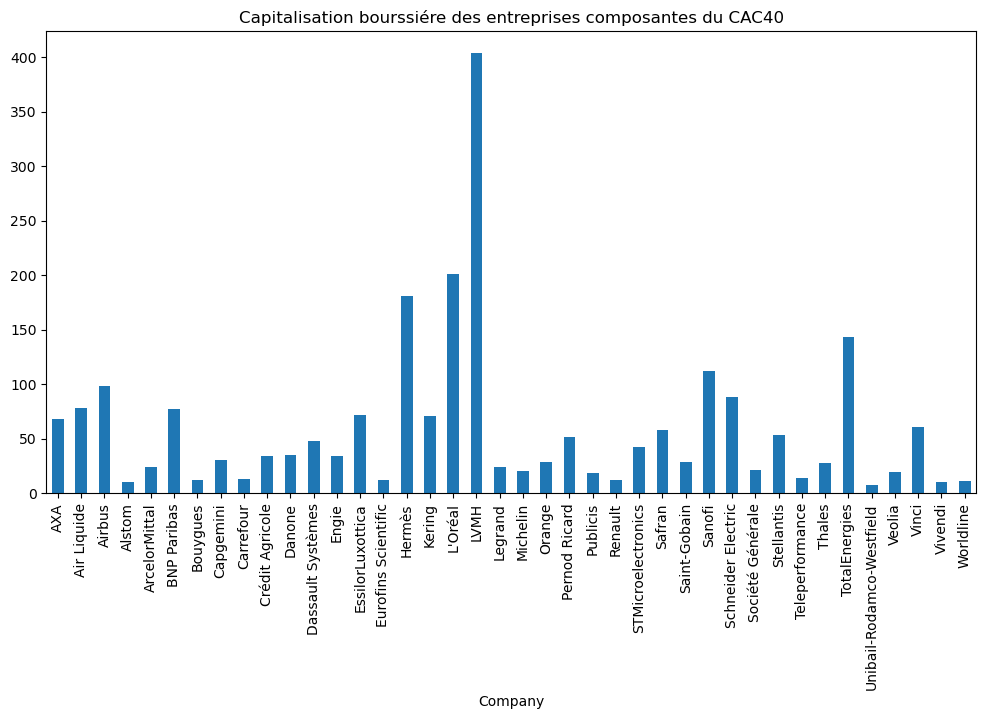

In [151]:
# Affichage d'un graphique à barres representant la capitalisation bourssiére des entreprises composantes de l'indice CAC40
plt.figure('Capitalisation bourssiére des entreprises composantes du CAC40')
plt.figure(figsize=(12,6))
plt.title('Capitalisation bourssiére des entreprises composantes du CAC40')
cac40.groupby(['Company'])['Market Capitalization'].mean().plot(kind = 'bar')

In [152]:
# Recherche de la plus grande entreprise par secteur !
composantes = cac40.groupby('Sector')['Market Capitalization'].nlargest(1)
composantes

Sector                  Ticker 
Basic Materials         AI.PA       78.439547
Communication Services  ORA.PA      28.912759
Consumer Cyclical       MC.PA      403.507937
Consumer Defensive      OR.PA      201.149989
Energy                  TTE.PA     143.693693
Financial Services      BNP.PA      77.273039
Healthcare              SAN.PA     112.227647
Industrials             AIR.PA      98.050777
Real Estate             URW.AS       7.894447
Technology              DSY.PA      48.308421
Utilities               ENGI.PA     33.908118
Name: Market Capitalization, dtype: float64

In [153]:
# Transformation du résultat en une dataframe
composantes = composantes.reset_index()
composantes

,Sector,Ticker,Market Capitalization
0,Basic Materials,AI.PA,78.439547
1,Communication Services,ORA.PA,28.912759
2,Consumer Cyclical,MC.PA,403.507937
3,Consumer Defensive,OR.PA,201.149989
4,Energy,TTE.PA,143.693693
5,Financial Services,BNP.PA,77.273039
6,Healthcare,SAN.PA,112.227647
7,Industrials,AIR.PA,98.050777
8,Real Estate,URW.AS,7.894447
9,Technology,DSY.PA,48.308421


In [154]:
# Classement par ordre décroissant de capitalisation boursière
composantes.sort_values(by = 'Market Capitalization', ascending = False)

,Sector,Ticker,Market Capitalization
2,Consumer Cyclical,MC.PA,403.507937
3,Consumer Defensive,OR.PA,201.149989
4,Energy,TTE.PA,143.693693
6,Healthcare,SAN.PA,112.227647
7,Industrials,AIR.PA,98.050777
0,Basic Materials,AI.PA,78.439547
5,Financial Services,BNP.PA,77.273039
9,Technology,DSY.PA,48.308421
10,Utilities,ENGI.PA,33.908118
1,Communication Services,ORA.PA,28.912759


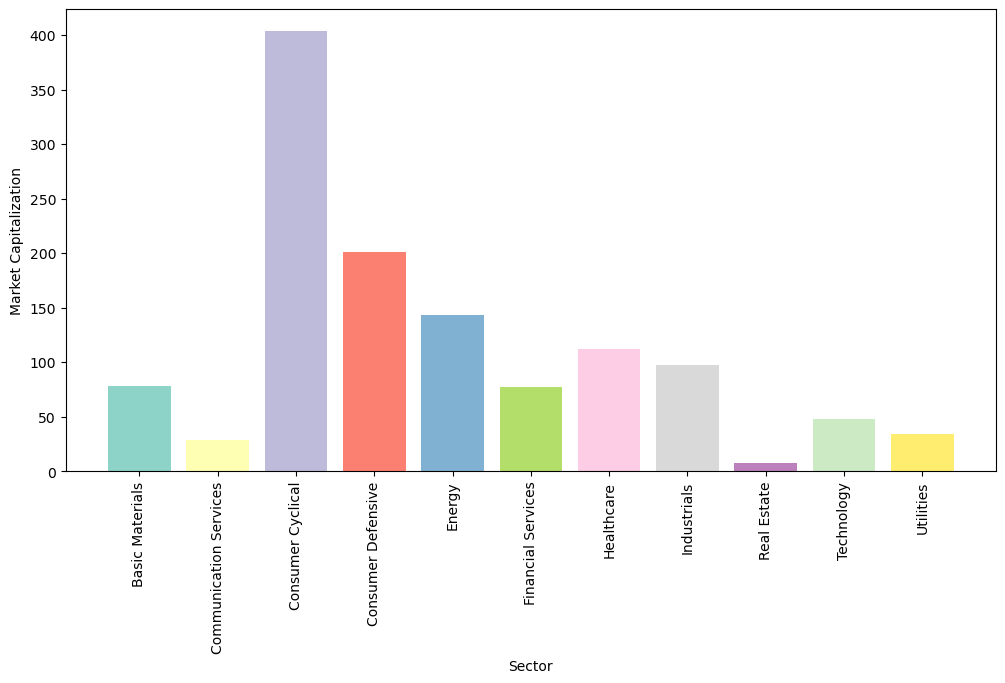

In [155]:
# Création d'une palette de 11 couleurs
colors = plt.cm.Set3(np.linspace(0, 1, 11))

# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(12,6))

# Création du graphique avec deux colonnes
ax.bar(composantes['Sector'], composantes['Market Capitalization'], color=colors)

# Configuration de l'axe des abscisses et des ordonnées
ax.set_xlabel('Sector')
ax.set_ylabel('Market Capitalization')
ax.set_xticklabels(composantes['Sector'], rotation=90)

# Affichage du graphique agrandi
plt.show()


In [156]:
# Création d'une liste des symboles des plus grandes entreprises
symbols = composantes['Ticker'].to_list()
symbols

['AI.PA',
 'ORA.PA',
 'MC.PA',
 'OR.PA',
 'TTE.PA',
 'BNP.PA',
 'SAN.PA',
 'AIR.PA',
 'URW.AS',
 'DSY.PA',
 'ENGI.PA']

In [157]:
# Téléchargement des prix journaliers de clôture de 2000 à 2023
start_ = dt.datetime.strptime('2000-01-01',"%Y-%m-%d")
stop = dt.datetime.strptime('2023-02-20',"%Y-%m-%d")
stocks_prices = yf.download(symbols,start=start_, end=stop)['Adj Close']
stocks_prices.head()

[*********************100%***********************]  11 of 11 completed


,AI.PA,AIR.PA,BNP.PA,DSY.PA,ENGI.PA,MC.PA,OR.PA,ORA.PA,SAN.PA,TTE.PA,URW.AS
Date,,,,,,,,,,,
2000-01-03,16.351419,NaN,15.061358,5.669178,10.364448,57.441422,54.507809,37.896141,19.196321,10.438009,10.233083
2000-01-04,15.625768,NaN,14.638011,5.110597,10.182961,52.007778,50.639069,35.871166,18.002525,10.058442,10.404987
2000-01-05,15.480635,NaN,14.328640,4.714588,10.040359,50.248302,48.911949,33.990818,17.243261,9.805404,10.395162
2000-01-06,16.593304,NaN,13.840165,4.772948,10.176475,49.679073,50.777237,33.556896,17.907017,9.520731,10.707040
2000-01-07,16.390123,NaN,14.019273,5.002216,9.982020,49.679073,51.813503,34.569378,18.862061,9.568177,10.640738


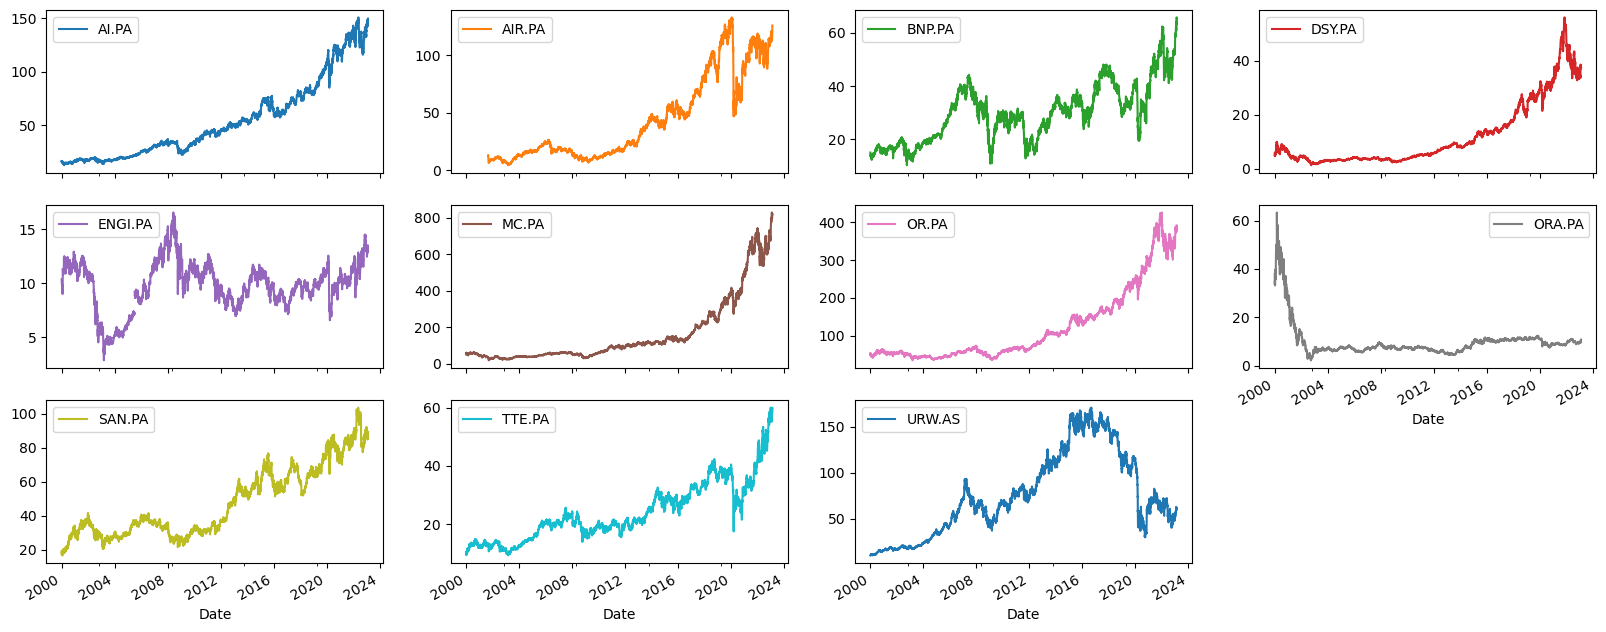

In [158]:
stocks_prices.plot(
    subplots = True, 
    layout = (4, 4), 
    figsize = (20, 11), 
    # Tous les graphiques ont les mêmes valeurs dans l'axe des abscisses
    sharex = True, 
    # Les axes des ordonnées sont différents
    sharey = False) 
plt.show()

Text(0.5, 1.0, "L'évolution des prix journaliers de cloture des actions des 11 grandes entreprises du CAC40")

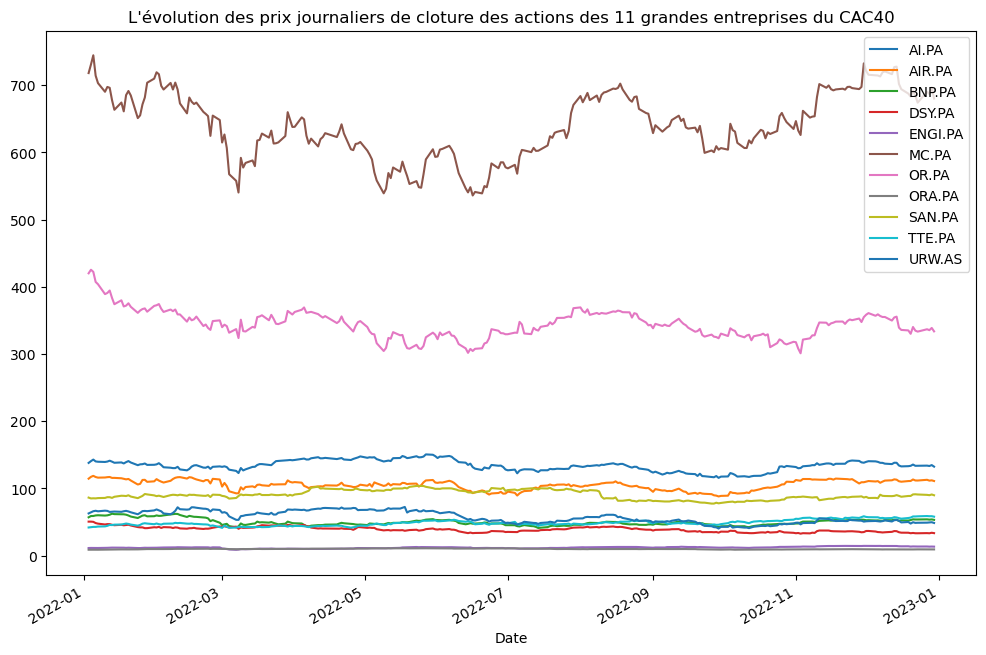

In [159]:
#affichage graphique des actions des plus grandes entreprises qui compose l'indice CAC40
stocks_prices['2022'].plot(figsize=(12, 8))
plt.title("L'évolution des prix journaliers de cloture des actions des 11 grandes entreprises du CAC40")

In [160]:
#selectionner l'action la plus chére dans la bource de paris
stocks_prices = stocks_prices.loc[:, ['MC.PA']]

In [161]:
# Transformation du résultat en une dataframe
stocks_prices = stocks_prices.reset_index()
stocks_prices.head()

,Date,MC.PA
0,2000-01-03,57.441422
1,2000-01-04,52.007778
2,2000-01-05,50.248302
3,2000-01-06,49.679073
4,2000-01-07,49.679073


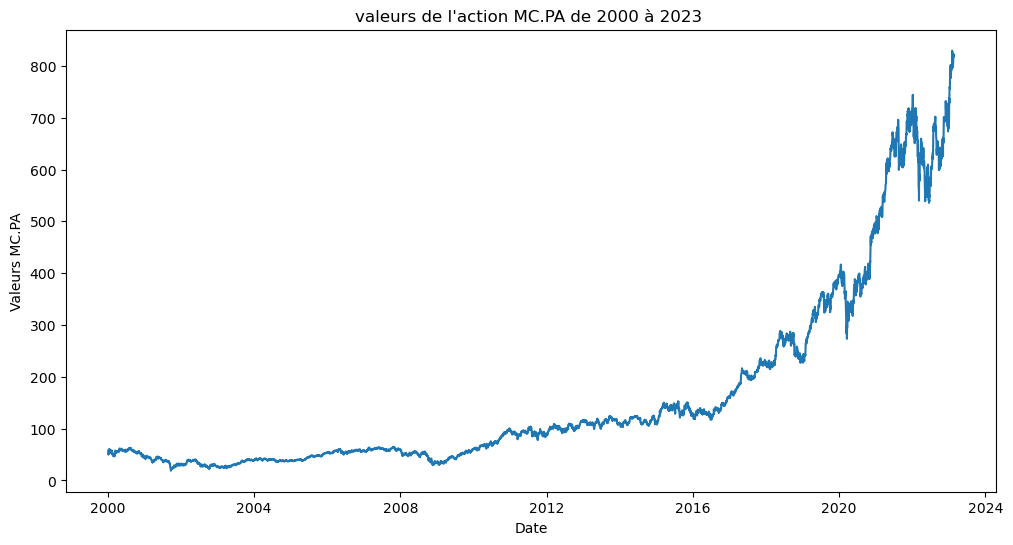

In [162]:
# Inversion de l'ordre chronologique
stocks_prices = stocks_prices[::-1]

# Configuration de la figure
fig = plt.figure(figsize=(12, 6)) 

# Configuration du graphique avec deux colonnes
plt.plot(stocks_prices['Date'], stocks_prices['MC.PA'])

# Configuration de l'axe des abscisses et des ordonnées
plt.xlabel('Date')
plt.ylabel('Valeurs MC.PA')
plt.title("valeurs de l'action MC.PA de 2000 à 2023 ")

# Affichage du graphique agrandi
plt.show()

### on peut conclure que le prix de l'action MC.PA a été multiplié par 16 durant les 23 derniéres années.

# Analyse et prévision de la série temporelle de l'action MC.PA de la Société  Louis Vuitton.

In [163]:
# Importation des librairies nécessaires pour la prévision
# plotly express pour la boite a moustache
import plotly.express as px 
from plotly import tools
import plotly.graph_objs as go
 
# prophet model 
from prophet import Prophet

# prophet preformance
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from IPython.display import set_matplotlib_formats

In [164]:
# Charger les données à partir d'un fichier CSV
data = pd.read_csv('C:/Users/mmeri/Downloads/MCPA.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-01,76.720001,76.900002,74.599998,76.739998,49.640244,730665.0
1,2000-03-02,76.000000,76.559998,74.199997,75.800003,49.032204,801500.0
2,2000-03-03,73.620003,74.800003,72.000000,73.000000,47.220978,1242345.0
3,2000-03-06,72.980003,73.180000,70.199997,71.300003,46.121311,1451610.0
4,2000-03-07,70.800003,76.800003,70.620003,75.000000,48.514713,2170085.0
...,...,...,...,...,...,...,...
5868,2022-12-23,681.500000,683.200012,670.099976,673.799988,673.799988,241292.0
5869,2022-12-27,683.299988,692.700012,682.299988,690.200012,690.200012,249850.0
5870,2022-12-28,692.299988,694.700012,685.799988,686.599976,686.599976,196630.0
5871,2022-12-29,684.700012,699.000000,682.200012,696.500000,696.500000,198655.0


In [165]:
# Suppression des colonnes non utile 
data = data.drop(['Adj Close','Volume'], axis=1)
data.head()

,Date,Open,High,Low,Close
0,2000-03-01,76.720001,76.900002,74.599998,76.739998
1,2000-03-02,76.000000,76.559998,74.199997,75.800003
2,2000-03-03,73.620003,74.800003,72.000000,73.000000
3,2000-03-06,72.980003,73.180000,70.199997,71.300003
4,2000-03-07,70.800003,76.800003,70.620003,75.000000


In [166]:
# Convertir la colonne Date en datetime
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close
0,2000-03-01,76.720001,76.900002,74.599998,76.739998
1,2000-03-02,76.000000,76.559998,74.199997,75.800003
2,2000-03-03,73.620003,74.800003,72.000000,73.000000
3,2000-03-06,72.980003,73.180000,70.199997,71.300003
4,2000-03-07,70.800003,76.800003,70.620003,75.000000


In [167]:
# Ajouter une nouvelle colonne au jeu de données correspondant au prix typique
data['typical_price'] = data.apply(lambda x : (x['Close']+ x['High'] + x['Low'])/3 ,axis=1)

# On rajoute aussi une colonne datetime
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,typical_price
0,2000-03-01,76.720001,76.900002,74.599998,76.739998,76.079999
1,2000-03-02,76.000000,76.559998,74.199997,75.800003,75.519999
2,2000-03-03,73.620003,74.800003,72.000000,73.000000,73.266668
3,2000-03-06,72.980003,73.180000,70.199997,71.300003,71.560000
4,2000-03-07,70.800003,76.800003,70.620003,75.000000,74.140002
...,...,...,...,...,...,...
5868,2022-12-23,681.500000,683.200012,670.099976,673.799988,675.699992
5869,2022-12-27,683.299988,692.700012,682.299988,690.200012,688.400004
5870,2022-12-28,692.299988,694.700012,685.799988,686.599976,689.033325
5871,2022-12-29,684.700012,699.000000,682.200012,696.500000,692.566671


In [168]:
# Faire une copie de la dataframe pour réaliser le graphique en chandeliers japonais
data2=data.copy()
data2

,Date,Open,High,Low,Close,typical_price
0,2000-03-01,76.720001,76.900002,74.599998,76.739998,76.079999
1,2000-03-02,76.000000,76.559998,74.199997,75.800003,75.519999
2,2000-03-03,73.620003,74.800003,72.000000,73.000000,73.266668
3,2000-03-06,72.980003,73.180000,70.199997,71.300003,71.560000
4,2000-03-07,70.800003,76.800003,70.620003,75.000000,74.140002
...,...,...,...,...,...,...
5868,2022-12-23,681.500000,683.200012,670.099976,673.799988,675.699992
5869,2022-12-27,683.299988,692.700012,682.299988,690.200012,688.400004
5870,2022-12-28,692.299988,694.700012,685.799988,686.599976,689.033325
5871,2022-12-29,684.700012,699.000000,682.200012,696.500000,692.566671


In [169]:
# Convertir la colonne Date en datetime
data2['Date'] = pd.to_datetime(data2['Date'])
data2.head()

,Date,Open,High,Low,Close,typical_price
0,2000-03-01,76.720001,76.900002,74.599998,76.739998,76.079999
1,2000-03-02,76.000000,76.559998,74.199997,75.800003,75.519999
2,2000-03-03,73.620003,74.800003,72.000000,73.000000,73.266668
3,2000-03-06,72.980003,73.180000,70.199997,71.300003,71.560000
4,2000-03-07,70.800003,76.800003,70.620003,75.000000,74.140002


In [170]:
# Visualisation du résultat
g1 = go.Scatter(
    x = data2['Date'],
    y = data2['Open'],
    mode = 'lines',
    name = 'Open')
 
g2 = go.Scatter(
    x = data2['Date'],
    y = data2['Close'],
    mode = 'lines',
    name = 'Close')
 
g3 = go.Scatter(
    x = data2['Date'],
    y = data2['typical_price'],
    mode = 'lines',
    name = 'typical_price')
 
layout = dict(
    title="Prix historique de l'ation MC.PA (2000-2023)",
    xaxis=dict(
         rangeslider=dict(visible = True),
         type='date')
    )
from plotly.offline import iplot
data2 = [g1,g2, g3]
fig = dict(data=data2, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [171]:
# Supprimer des colonnes non utilisés pour la modélisation
data = data.drop(['Open','High','Low','Close'], axis=1)

In [172]:
# Convertir la colonne Date en datetime
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,typical_price
0,2000-03-01,76.079999
1,2000-03-02,75.519999
2,2000-03-03,73.266668
3,2000-03-06,71.560000
4,2000-03-07,74.140002


In [173]:
# Boite a moustache(import plotly.express as px)
px.box(y= 'typical_price',data_frame=data)


# Prévision de la série temporelle du prix de l'action MC.PA de la Société  Louis Vuitton.

21:40:34 - cmdstanpy - INFO - Chain [1] start processing
21:40:38 - cmdstanpy - INFO - Chain [1] done processing


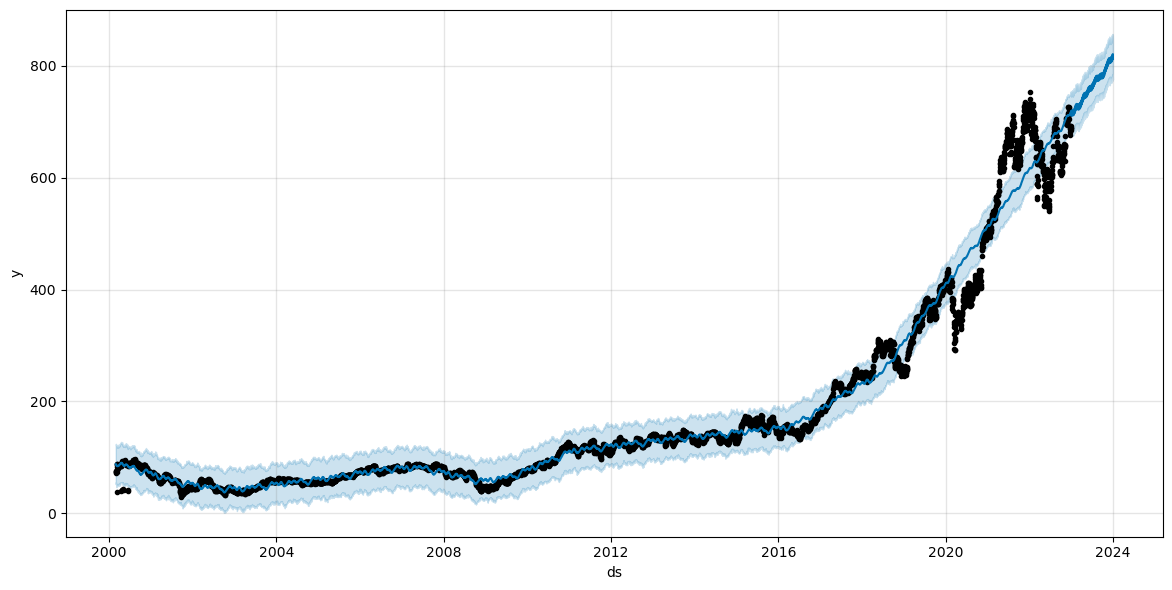

In [174]:
# Renommer les colonnes en 'ds' et 'y' pour correspondre à la syntaxe de Prophet
data_model = data.rename(columns={'Date': 'ds', 'typical_price': 'y'})

# Créer un objet Prophet

prophet_model = Prophet()
# Entraîner le modèle
prophet_model.fit(data_model)

# Prévoir les valeurs futures
future = m.make_future_dataframe(periods=365)  # Prévoir 365 jours dans le futur
forecast = m.predict(future)

# Afficher les prévisions
fig = m.plot(forecast)
fig.set_size_inches(12,6)
plt.show()

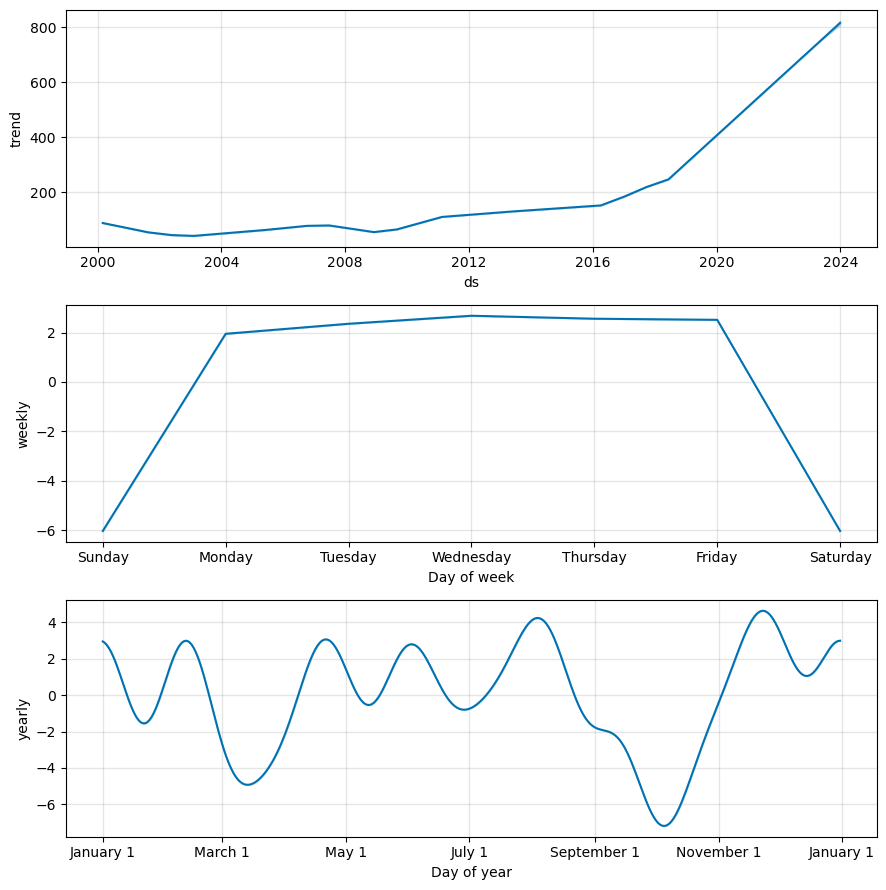

In [175]:
# Affichage des composantes du modéle: tendance, saisonnalité(Hebdomadaire, Annuelle)
m.plot_components(forecast)
plt.show()

In [176]:
# Application de la validation croisée de la série temporelle pour mesurer l’erreur de prévision
data_cv = cross_validation(prophet_model, initial='90 days', period='30 days', horizon = '30 days')


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/274 [00:00<?, ?it/s]

21:41:00 - cmdstanpy - INFO - Chain [1] start processing
21:41:00 - cmdstanpy - INFO - Chain [1] done processing
21:41:01 - cmdstanpy - INFO - Chain [1] start processing
21:41:01 - cmdstanpy - INFO - Chain [1] done processing
21:41:01 - cmdstanpy - INFO - Chain [1] start processing
21:41:01 - cmdstanpy - INFO - Chain [1] done processing
21:41:01 - cmdstanpy - INFO - Chain [1] start processing
21:41:01 - cmdstanpy - INFO - Chain [1] done processing
21:41:01 - cmdstanpy - INFO - Chain [1] start processing
21:41:01 - cmdstanpy - INFO - Chain [1] done processing
21:41:02 - cmdstanpy - INFO - Chain [1] start processing
21:41:02 - cmdstanpy - INFO - Chain [1] done processing
21:41:02 - cmdstanpy - INFO - Chain [1] start processing
21:41:02 - cmdstanpy - INFO - Chain [1] done processing
21:41:02 - cmdstanpy - INFO - Chain [1] start processing
21:41:02 - cmdstanpy - INFO - Chain [1] done processing
21:41:02 - cmdstanpy - INFO - Chain [1] start processing
21:41:03 - cmdstanpy - INFO - Chain [1]

21:41:32 - cmdstanpy - INFO - Chain [1] done processing
21:41:32 - cmdstanpy - INFO - Chain [1] start processing
21:41:32 - cmdstanpy - INFO - Chain [1] done processing
21:41:33 - cmdstanpy - INFO - Chain [1] start processing
21:41:33 - cmdstanpy - INFO - Chain [1] done processing
21:41:33 - cmdstanpy - INFO - Chain [1] start processing
21:41:34 - cmdstanpy - INFO - Chain [1] done processing
21:41:34 - cmdstanpy - INFO - Chain [1] start processing
21:41:35 - cmdstanpy - INFO - Chain [1] done processing
21:41:35 - cmdstanpy - INFO - Chain [1] start processing
21:41:36 - cmdstanpy - INFO - Chain [1] done processing
21:41:36 - cmdstanpy - INFO - Chain [1] start processing
21:41:36 - cmdstanpy - INFO - Chain [1] done processing
21:41:37 - cmdstanpy - INFO - Chain [1] start processing
21:41:37 - cmdstanpy - INFO - Chain [1] done processing
21:41:37 - cmdstanpy - INFO - Chain [1] start processing
21:41:38 - cmdstanpy - INFO - Chain [1] done processing
21:41:38 - cmdstanpy - INFO - Chain [1] 

21:43:03 - cmdstanpy - INFO - Chain [1] done processing
21:43:04 - cmdstanpy - INFO - Chain [1] start processing
21:43:05 - cmdstanpy - INFO - Chain [1] done processing
21:43:06 - cmdstanpy - INFO - Chain [1] start processing
21:43:08 - cmdstanpy - INFO - Chain [1] done processing
21:43:08 - cmdstanpy - INFO - Chain [1] start processing
21:43:11 - cmdstanpy - INFO - Chain [1] done processing
21:43:11 - cmdstanpy - INFO - Chain [1] start processing
21:43:13 - cmdstanpy - INFO - Chain [1] done processing
21:43:13 - cmdstanpy - INFO - Chain [1] start processing
21:43:14 - cmdstanpy - INFO - Chain [1] done processing
21:43:15 - cmdstanpy - INFO - Chain [1] start processing
21:43:16 - cmdstanpy - INFO - Chain [1] done processing
21:43:17 - cmdstanpy - INFO - Chain [1] start processing
21:43:18 - cmdstanpy - INFO - Chain [1] done processing
21:43:19 - cmdstanpy - INFO - Chain [1] start processing
21:43:21 - cmdstanpy - INFO - Chain [1] done processing
21:43:21 - cmdstanpy - INFO - Chain [1] 

21:46:51 - cmdstanpy - INFO - Chain [1] done processing
21:46:52 - cmdstanpy - INFO - Chain [1] start processing
21:46:56 - cmdstanpy - INFO - Chain [1] done processing
21:46:56 - cmdstanpy - INFO - Chain [1] start processing
21:46:59 - cmdstanpy - INFO - Chain [1] done processing
21:46:59 - cmdstanpy - INFO - Chain [1] start processing
21:47:03 - cmdstanpy - INFO - Chain [1] done processing
21:47:04 - cmdstanpy - INFO - Chain [1] start processing
21:47:06 - cmdstanpy - INFO - Chain [1] done processing
21:47:07 - cmdstanpy - INFO - Chain [1] start processing
21:47:11 - cmdstanpy - INFO - Chain [1] done processing
21:47:11 - cmdstanpy - INFO - Chain [1] start processing
21:47:15 - cmdstanpy - INFO - Chain [1] done processing
21:47:15 - cmdstanpy - INFO - Chain [1] start processing
21:47:18 - cmdstanpy - INFO - Chain [1] done processing
21:47:18 - cmdstanpy - INFO - Chain [1] start processing
21:47:21 - cmdstanpy - INFO - Chain [1] done processing
21:47:22 - cmdstanpy - INFO - Chain [1] 

In [177]:
# Affichage de la table des prévisions
data_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2000-06-29,95.554940,79.120435,110.804916,89.573331,2000-06-28
1,2000-06-30,89.112274,73.851751,105.002343,86.973333,2000-06-28
2,2000-07-03,66.236111,51.994723,80.389101,86.483335,2000-06-28
3,2000-07-04,69.229858,53.382742,83.456813,85.866664,2000-06-28
4,2000-07-05,60.985504,45.967967,75.926781,87.466667,2000-06-28


In [178]:
# Affichage de la table des erreurs de prévisions 
data_p = performance_metrics(data_cv)
data_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1098.335765,33.141149,18.890114,0.098517,0.084478,0.100879,0.458333
1,4 days,1117.555175,33.429855,19.110642,0.099820,0.085110,0.102297,0.442564
2,5 days,1143.917621,33.821851,19.424590,0.101566,0.084768,0.104152,0.439073
3,6 days,1161.787146,34.084999,19.678273,0.103772,0.087889,0.106465,0.424289
4,7 days,1179.720975,34.347066,19.828992,0.105671,0.090375,0.108707,0.424324


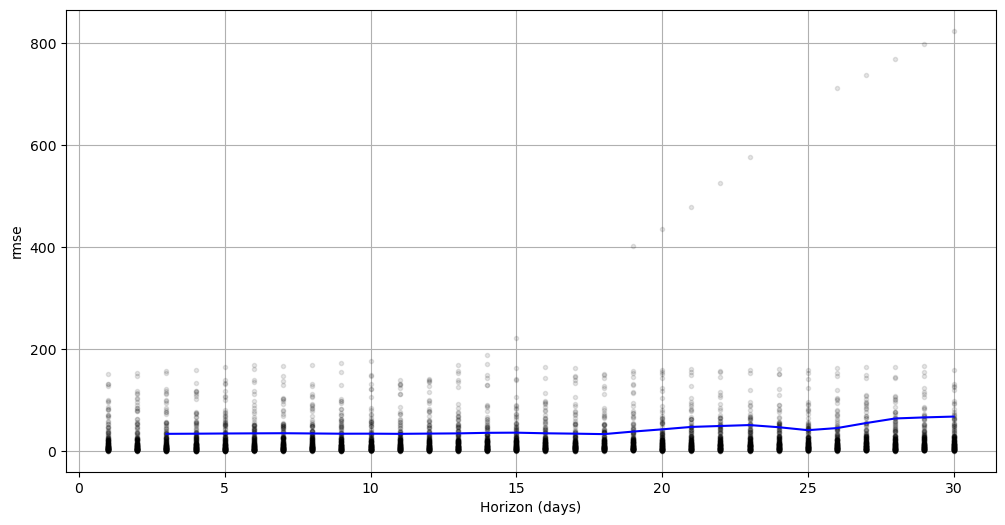

In [181]:
# Affichage du graphique des erreurs de prévisions
fig = plot_cross_validation_metric(data_cv, metric='rmse')
fig.axes[0].lines[0].set_color('black')
fig.set_size_inches(12,6)
fig.show()


### Nous voyons que l’erreur est  linéairement stable en fonction de la période de prévision. Ainsi, avec cette configuration nous pourrons avoir des prévisions fiables sur une période inférieure à 15j.